Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Extracting features

In [4]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
      
# Load your feature
feature_df = pd.read_csv(os.path.join(path_now,"UCI_HAR_Dataset","features.txt"), delim_whitespace=True, header=None)
print(feature_df)

df_list = feature_df.values.tolist()
print(df_list)


       0                                     1
0      1                     tBodyAcc-mean()-X
1      2                     tBodyAcc-mean()-Y
2      3                     tBodyAcc-mean()-Z
3      4                      tBodyAcc-std()-X
4      5                      tBodyAcc-std()-Y
..   ...                                   ...
556  557      angle(tBodyGyroMean,gravityMean)
557  558  angle(tBodyGyroJerkMean,gravityMean)
558  559                  angle(X,gravityMean)
559  560                  angle(Y,gravityMean)
560  561                  angle(Z,gravityMean)

[561 rows x 2 columns]
[[1, 'tBodyAcc-mean()-X'], [2, 'tBodyAcc-mean()-Y'], [3, 'tBodyAcc-mean()-Z'], [4, 'tBodyAcc-std()-X'], [5, 'tBodyAcc-std()-Y'], [6, 'tBodyAcc-std()-Z'], [7, 'tBodyAcc-mad()-X'], [8, 'tBodyAcc-mad()-Y'], [9, 'tBodyAcc-mad()-Z'], [10, 'tBodyAcc-max()-X'], [11, 'tBodyAcc-max()-Y'], [12, 'tBodyAcc-max()-Z'], [13, 'tBodyAcc-min()-X'], [14, 'tBodyAcc-min()-Y'], [15, 'tBodyAcc-min()-Z'], [16, 'tBodyAcc-sma()'], [17

Getting raw data - X train

In [5]:

os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())
      
# Load your dataset
combined_df = pd.read_csv(os.path.join(path_now,"UCI_HAR_Dataset","train", "X_train.txt"), delim_whitespace=True, header=None)

print(combined_df.shape)
print(combined_df)


(7352, 561)
           0         1         2         3         4         5         6    \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.299665 -0.057193 -0.181233 -0.195387  0.039905  0.077078 -0.282301   
7348  0.273853 -0.007749 -0.147468 -0.235309  0.004816  0.059280 -0.322552   
7349  0.273387 -0.017011 -0.045022 -0.218218 -0.103822  0.274533 -0.304515   
7350  0.289654 -0.018843 -0.158281 -0.219139 -0.111412  0.268893 -0.310487   
7351  0.351503 -0.012423 -0.203867 -0.269270 -0.087212  0.177404 -0.377404   

           7         8         9    ...       551  

Getting raw data - Y labels

In [6]:
df_y_label = pd.read_csv(os.path.join(path_now,"UCI_HAR_Dataset","train", "y_train.txt"), delim_whitespace=True, header=None)

# print(df_y_label.shape)
# print(df_y_label)

Lets train

In [23]:
from sklearn.tree import DecisionTreeClassifier

n = 8
# Without setting random_state
clf1 = DecisionTreeClassifier(max_depth = n, random_state= 41)
clf1.fit(combined_df, df_y_label)


DecisionTreeClassifier(max_depth=8, random_state=41)

Test on Train Data

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Accuracy: 0.5450
Precision: 0.3501
Recall: 0.5450

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54      1226
           2       0.00      0.00      0.00      1073
           3       0.00      0.00      0.00       986
           4       0.00      0.00      0.00      1286
           5       0.52      1.00      0.68      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.55      7352
   macro avg       0.31      0.50      0.37      7352
weighted avg       0.35      0.55      0.41      7352



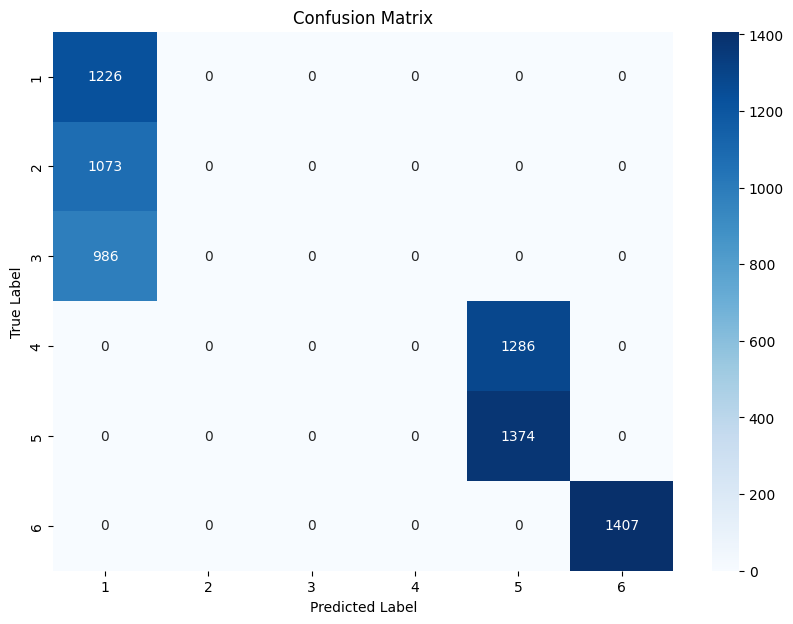

In [8]:
# Predict the test set
y_pred = clf1.predict(combined_df)

# Calculate accuracy
accuracy = accuracy_score(df_y_label, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label, y_pred, average='weighted')
recall = recall_score(df_y_label, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Get Test Data

In [9]:

os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())
      
# Load your dataset
combined_df_test = pd.read_csv(os.path.join(path_now,"UCI_HAR_Dataset","test", "X_test.txt"), delim_whitespace=True, header=None)
df_y_label_test = pd.read_csv(os.path.join(path_now,"UCI_HAR_Dataset","test", "y_test.txt"), delim_whitespace=True, header=None)




In [10]:
print(combined_df_test.shape)
print(df_y_label_test.shape)

print(combined_df.shape)
print(df_y_label.shape)

(2947, 561)
(2947, 1)
(7352, 561)
(7352, 1)


In [11]:
# print(combined_df_test.isnull().sum())  # Check for NaN values
# print(np.isinf(combined_df_test).sum())  # Check for infinite values

combined_df_test = combined_df_test.fillna(0)  # Fill NaN values with 0 (or another appropriate value)
combined_df_test = combined_df_test.replace([np.inf, -np.inf], 0)  # Replace infinite values

# combined_df_test = combined_df_test.astype(combined_df.dtypes)

# print(combined_df_test.head())
print(combined_df.head())



        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0

Now test on TEST data

depth: 8
Accuracy: 0.8721
Precision: 0.8738
Recall: 0.8721

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.95      0.89       496
           2       0.85      0.77      0.81       471
           3       0.88      0.84      0.86       420
           4       0.87      0.76      0.81       491
           5       0.80      0.89      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947



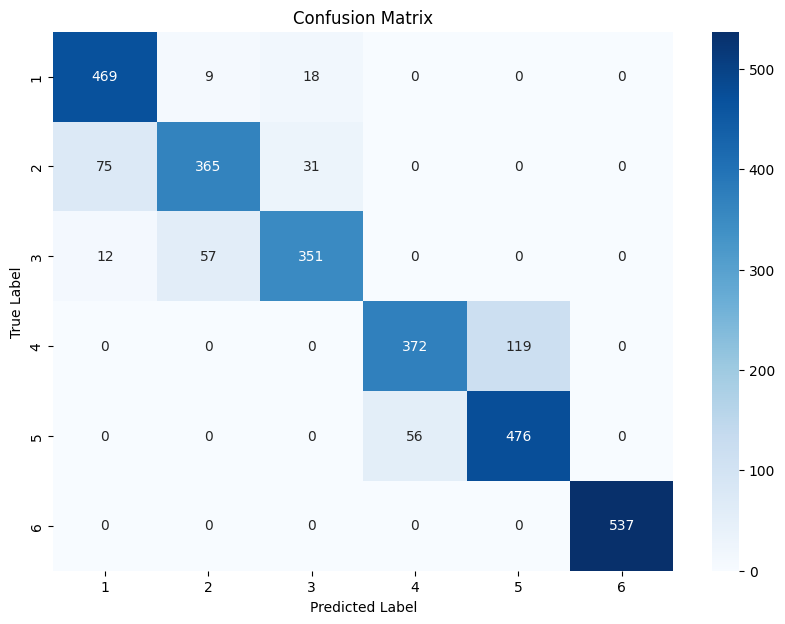

In [24]:
# Predict the test set
y_pred = clf1.predict(combined_df_test)

# Calculate accuracy
accuracy = accuracy_score(df_y_label_test, y_pred)

# Calculate precision, recall
precision = precision_score(df_y_label_test, y_pred, average='weighted')
recall = recall_score(df_y_label_test, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_y_label_test, y_pred)

# Display the metrics
print(f"depth: {n}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(df_y_label_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


REPORT

Task2.1  

part(a)   
Accuracy: 0.5585  
Precision: 0.5934   
Recall: 0.5585     

part(b)     
Accuracy: 0.7994   
Precision: 0.8000   
Recall: 0.7994   

part(c)   
Accuracy: 0.8646   
Precision: 0.8654   
Recall: 0.8646   

REPORT 2

depth: 2   
Accuracy: 0.5310  
Precision: 0.3363   
Recall: 0.5310   
   
depth: 3   
Accuracy: 0.7224   
Precision: 0.6710   
Recall: 0.7224   
   
depth: 4   
Accuracy: 0.8096   
Precision: 0.8253   
Recall: 0.8096   
   
depth: 5   
Accuracy: 0.8395  
Precision: 0.8479   
Recall: 0.8395   
  
depth: 6   
Accuracy: 0.8541  
Precision: 0.8598  
Recall: 0.8541   
   
depth: 7   
Accuracy: 0.8653   
Precision: 0.8656   
Recall: 0.8653   

depth: 8   
Accuracy: 0.8721  
Precision: 0.8738   
Recall: 0.8721  

PLOT

In [27]:
y1 = [0.4613, 0.5332, 0.6030, 0.6323, 0.6270, 0.6321, 0.6358]
y2 = [0.5311, 0.7078, 0.7834, 0.8113, 0.8079, 0.8156, 0.8227]
y3 = [0.5310,0.7224, 0.8096,0.8395,0.8541, 0.8653,0.8721 ]

In [33]:
y1_precision = [0.3088,0.4548, 0.5938, 0.6263,0.6271, 0.6364,0.6389 ]
y2_precision = [0.3364, 0.6623, 0.7988, 0.8111 , 0.8179 , 0.8197, 0.8242 ]
y3_precision = [0.3363, 0.6710, 0.8253, 0.8479 , 0.8598, 0.8656, 0.8738]

In [ ]:
# y1_recall = [0.4613, 0.5332, 0.6030, 0.6323, 0.6270, 0.6321, 0.6358]
# y2_recall = [0.5311, 0.7078, 0.7834, 0.8113, 0.8079, 0.8156, 0.8227]
# y3_recall = [0.5310,0.7224, 0.8096,0.8395,0.8541, 0.8653,0.8721 ]

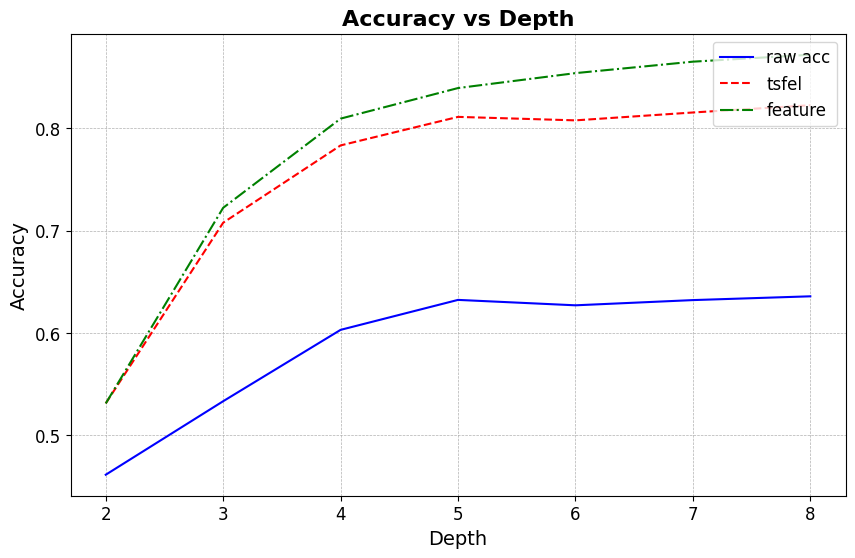

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(2, 8, 7)

# Create a plot
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(x, y1, label='raw acc', color='blue', linestyle='-')
plt.plot(x, y2, label='tsfel', color='red', linestyle='--')
plt.plot(x, y3, label='feature', color='green', linestyle='-.')

# Adding a title
plt.title('Accuracy vs Depth', fontsize=16, fontweight='bold')

# Labeling the axes
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Customizing the tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()


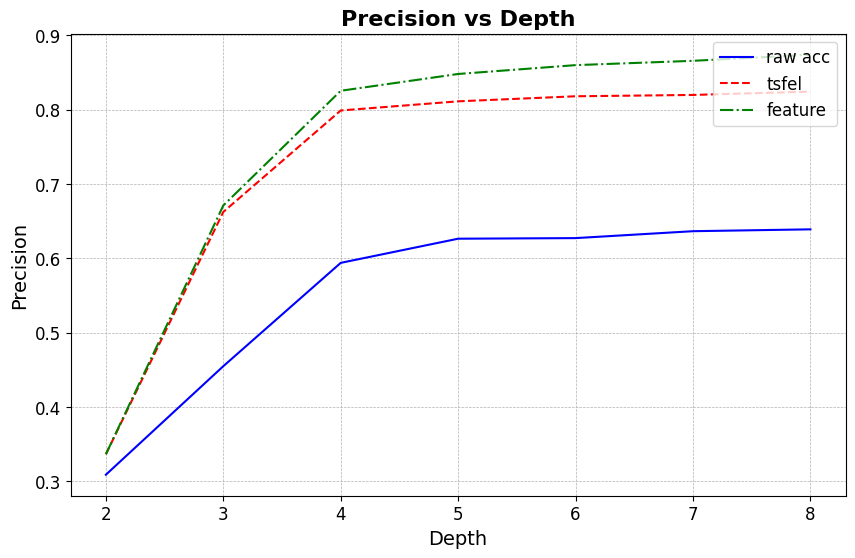

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(2, 8, 7)

# Create a plot
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(x, y1_precision, label='raw acc', color='blue', linestyle='-')
plt.plot(x, y2_precision, label='tsfel', color='red', linestyle='--')
plt.plot(x, y3_precision, label='feature', color='green', linestyle='-.')

# Adding a title
plt.title('Precision vs Depth', fontsize=16, fontweight='bold')

# Labeling the axes
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Precision', fontsize=14)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Customizing the tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()
